# Chapitre 8 : Préprocessing

La préparation de données en machine learning est une etapes primordiale pour avoir.Elle nous aide a eliminée au maximum les données eronées et bien plus encore.

Les étapes du préprocessing:

1. **Encodage** : Qui consiste a representé des données qualitatives en données numériques.
2. **Normalisation** : Permet de mettre au meme echéle toutes les données quantitative. facilite l'apprentissage
3. **Imputation** : Remplacer les donées manquante par des données statistiques.
4. **Sélection** : Utilise les testes statistiques pour selectionnée les variables les plus utiles pour notre modèle.
5. **Extraction** : Générer des nouvelles variables  appartir d'inforamtions caché au dataset.

En Sklearn: 
- [ Encodage, Normalisation] => sklearn.preprocessing.
- imputation => sklearn.impute .
- sélection => sklearn.feature_selection .
- sklearn.feature_extraction.

In [175]:
from sklearn.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt

## 8.1 Encodage
### 8.1.1 Transformeurs Ordinaires

In [176]:
X=np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])
encoder=LabelEncoder()#developpe une méthode en analysant les données de train_set
encoder.fit_transform(X)#applique la transformation sur toutes les données quand lui fournit

array([0, 1, 0, 2])

In [177]:
encoder.inverse_transform([0, 1, 1])#décodage.

array(['Chat', 'Chien', 'Chien'], dtype='<U6')

In [178]:
Y=np.array([['Chat', 'Poils'],
            ['Chien', 'Poils'],
            ['Oiseau', 'Plumes']
])
encoder_ordi=OrdinalEncoder()
encoder_ordi.fit_transform(Y)

array([[0., 1.],
       [1., 1.],
       [2., 0.]])

In [179]:
encoder_ordi.inverse_transform([[0,0]])

array([['Chat', 'Plumes']], dtype='<U6')

### 8.1.2 Transformeurs Hots
Pour evité l'exersion des operations arithmitiques (comme la comparaison) sur les catégories. On utilise *Encodage One Hot*

In [180]:
encoder_b = LabelBinarizer(sparse_output=True)#sparse_output=True: activer la compression <=> OneHotEncoder()
encoder_b.fit_transform(X)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [181]:
encoder_b.inverse_transform(np.array([[1,0,0]]))

array(['Chat'], dtype='<U6')

Sur Un tableau multidimentionnel on utilise la class **OneHotEncoder()** Pour encoder les données.

## 8.2 Normalisation

### 8.2.1 Nomralisation Min Max

In [182]:
X_train=np.array([[70], [80], [120]])

**MinMaxScaler**: tranforme chaque valeur pour qu'elle soit comprise entre 0 et 1

In [183]:
#Xscal=(X - Xmin)/(Xmax - Xmin)
scaler=MinMaxScaler()
X_train_sc=scaler.fit_transform(X_train)
X_train_sc

array([[0. ],
       [0.2],
       [1. ]])

Application sur les fleurs d'iris

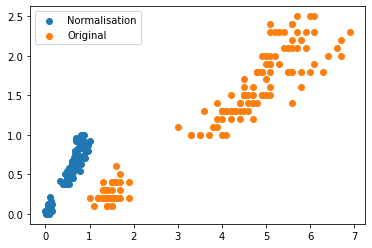

In [184]:
from sklearn.datasets import load_iris
iris=load_iris()
data=iris.data
data_scal=MinMaxScaler().fit_transform(data)
plt.scatter(data_scal[:, 2], data_scal[:, 3], label='Normalisation')
plt.scatter(data[:, 2], data[:, 3], label='Original')
plt.legend()
plt.show()

### 8.2.2 Standardisation

**StandardScaler**: tranforme les données pour ressemblé a la loi normale (X-moy)/ecar

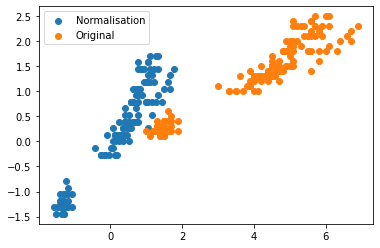

In [185]:
data_scal=StandardScaler().fit_transform(data)
plt.scatter(data_scal[:, 2], data_scal[:, 3], label='Normalisation')
plt.scatter(data[:, 2], data[:, 3], label='Original')
plt.legend()
plt.show()

Ces Methode de standardisation sont sensible au valeurs abérantes (outliers).

il existe une autre méthode qui est peu sensible au outliers c'est la méthode **RobustScaler()** 

Xscal=(X-median)/IQR =(Q3-Q1)

In [186]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

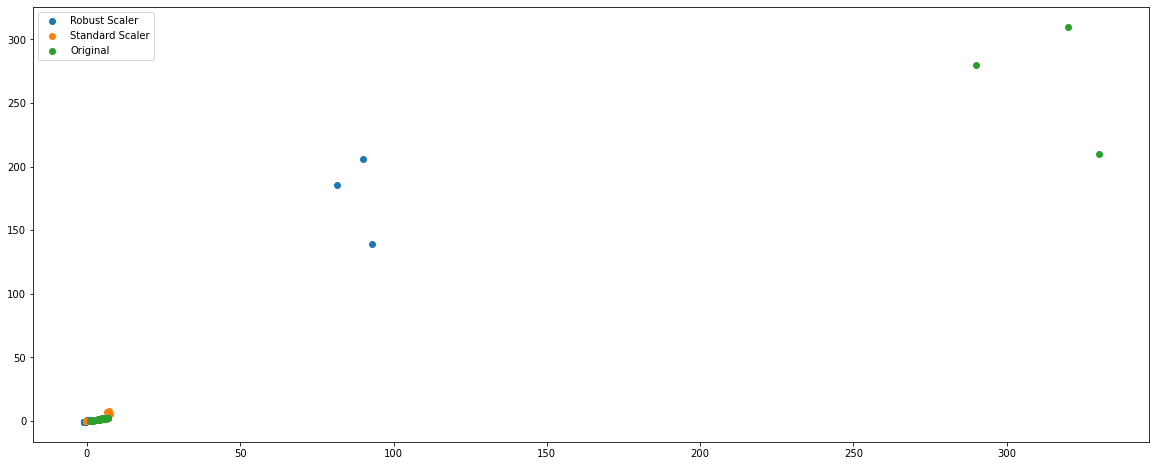

In [187]:
outliers = 10*np.random.randint(20, 40, [3, 4])

data=np.vstack((data, outliers))
data_scal=RobustScaler().fit_transform(data)
data_scal_nomr=StandardScaler().fit_transform(data)
plt.figure(figsize=(20, 8))
plt.scatter(data_scal[:, 2], data_scal[:, 3], label='Robust Scaler')
plt.scatter(data_scal_nomr[:, 2], data_scal_nomr[:, 3], label='Standard Scaler')
plt.scatter(data[:, 2], data[:, 3], label='Original')
plt.legend()
plt.show()

On remarque que La methode robust raduit les distance sans déformé les données